In [130]:
from scipy.stats import triang
import pandas as pd
import math as mt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
plt.rcParams['figure.figsize'] = (11,7)
%matplotlib inline



In [2]:
k=2.241690951252626740e-01
a=3.235763799429372511e+01
b=3.715147706071799405e+01


In [3]:
df = pd.DataFrame(triang.rvs(k,a,b, size=7800), columns=["workload"])
data_rend = pd.read_csv('stock.csv')
error = float(data_rend.var()/mt.sqrt(data_rend.count()))

lim_inf =  float(data_rend.mean() -error)
lim_sup =  float(data_rend.mean() +error)

In [4]:
data_rend['workload'] = list(df['workload'].sample(n=78))
data_rend['workload_filter'] = df[(df['workload'] >= lim_inf) & (df['workload'] <=lim_sup)].sample(n=78).workload.values.tolist()



In [5]:
data_rend.describe()

,real,workload,workload_filter
count,78.000000,78.000000,78.000000
mean,47.642919,47.202843,47.023346
std,8.069030,7.687872,4.453263
min,33.454405,33.128594,40.280991
25%,41.022742,40.679310,43.249171
50%,46.362813,47.992510,46.317547
75%,54.654541,53.249622,51.411758
max,67.403442,61.339699,54.365799


In [9]:
data_rend


,real,workload,workload_filter
0,49.190000,49.967084,42.255609
1,47.990000,38.198693,41.255089
2,40.560000,41.557548,54.281600
3,41.326218,35.263070,49.097270
4,43.528485,54.830560,42.004380
...,...,...,...
73,50.494323,46.694243,45.402413
74,40.685840,49.695750,44.048946
75,38.390646,44.972856,48.441835
76,43.944794,36.014502,41.375839


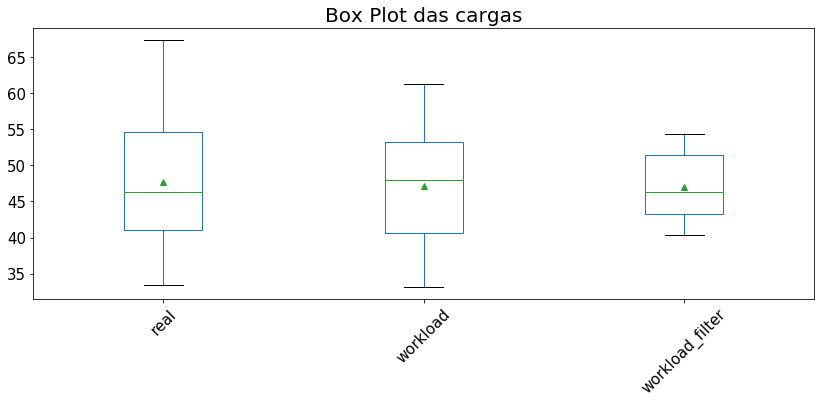

In [136]:
f, axes = plt.subplots(1, 1,figsize=(14 ,5) ,sharex=True)
bx = data_rend.boxplot(column=['real','workload','workload_filter'],grid=False, rot=45, fontsize=15,figsize=[14,5],showmeans=True)
bx.set_title("Box Plot das cargas", fontsize = 20)
f.show()


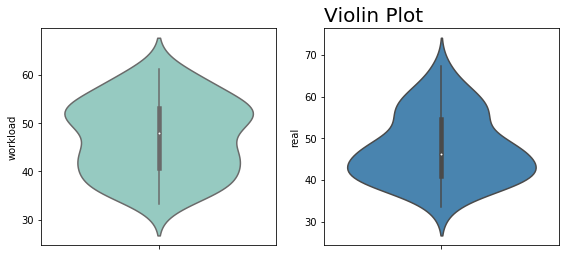

In [161]:
f, axes = plt.subplots(1, 2)
plt.title("Violin Plot", fontsize = 20, color="black", loc ="left")
sns.violinplot( y=data_rend['workload'] ,ax=axes[0],palette="Set3")
sns.violinplot( y=data_rend['real'],ax=axes[1],palette="Blues_d" )
plt.subplots_adjust(left=0.5, bottom=None, right=1.7, top=None, wspace=None, hspace=None)
plt.show()


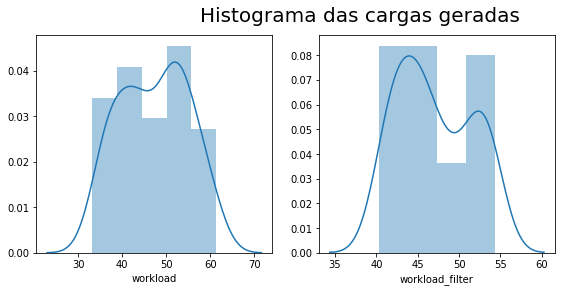

In [179]:
f, axes = plt.subplots(1, 2)
f.suptitle('Histograma das cargas geradas', fontsize=20,horizontalalignment="center",x=1.25)
plt.subplots_adjust(left=0.5, bottom=None, right=1.7, top=None, wspace=None, hspace=None)
sns.distplot(data_rend['workload'],ax=axes[0])
sns.distplot(data_rend['workload_filter'],ax=axes[1])
plt.show()

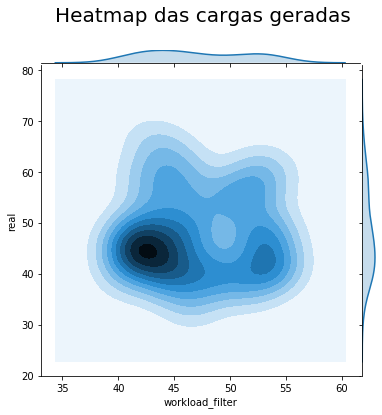

In [215]:
f.suptitle('Histograma das cargas geradas', fontsize=20,horizontalalignment="center",x=1.25)
g=sns.jointplot(x="workload_filter", y="real", data=data_rend, kind="kde",ratio=20)
g.fig.suptitle("Heatmap das cargas geradas", fontsize = 20 )
plt.show()